# Исследование рынка заведений общественного питания Москвы

## Введение

Компания-заказчик планирует открытие нового заведения общественного питания в Мсокве. Для разработки стратегии развития клиенту необходим анализ рынка заведений общественного питания города Москва. В качестве источника данных предложено использовать открытые данные в сети интернет.

## Цель проекта
Выполнить исследовательский анализ рынка общественного питания в Москве на основе открытых данных правительства Москвы. На основе полученных результатов подготовить рекомендации для инвесторов. 

## Описание данных.
Датасет "rest_data.csv", включает информацию об объектах общественного питания по следующим параметрам:  

id — идентификатор объекта;  
object_name — название объекта общественного питания;  
chain — сетевой ресторан;  
object_type — тип объекта общественного питания;  
address — адрес;  
number — количество посадочных мест.  

Датасет "districts", сформирован на основе данных портала открытых данных правительства Москвы, включает информацию о районах и улицах Москвы:  

street - улица;  
areaid - идентификатор района;  
okrug - округ;  
area - район.  

## План работы.

1. Введение
2. Изучение общей информации о предоставленных данных
3. Оценка соотношения количества различных видов объектов общественного питания.
4. Характеристика сетевых и несетевых заведений.
5. Характеристика заведений общественного питания по количеству посадочных мест.
6. География заведений общественного питания Москвы.
7. Общий вывод и рекомендации. 

# Изучение общей информации о предоставленных данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import textwrap
from io import BytesIO
import requests

## Общая информационная сводка о данных


In [2]:
rest_data = pd.read_csv('/home/daniil/Documents/datasets/catering/rest_data.csv')

# Импорт данных, содержащих информацию об улицах и районах Москвы
spreadsheet_id = '1_g06cWHzwy-PGGrDqR-vP09_wmzRBs3xAHlaYq6s5FU'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
districts = pd.read_csv(BytesIO(r.content))

#df.columns = ['street','areaid','okrug','area']
#df['street']=df['street'].str.lower()

tables = [rest_data, districts]
names = ['rest_data','districts']

In [3]:
for name, table in zip(names, tables):
    print(
        f'\n\033[1;30;47m_____________НАБОР:  {name.upper()}_____________\033[0;0m\n',
        '\n\033[2;30;47m Вывод первых строк: \033[0;0m',
        )
    display(table.head(3))
    print('\n\033[2;30;47m Общая сводка : \033[0;0m') # вывод общей сводки о датасете
    display(table.info())
    print('\033[2;30;47m Подсчет доли пропусков в % : \033[0;0m')
    display(round(table.isnull().mean() * 100, 2))
    print('\033[2;30;47m Подсчет дубликатов :\033[0;0m')
    display(round(table.duplicated().mean() * 100, 2))    # проверка явных дубликатов
    print('\n\033[2;30;47m Сводка числовых значений, включая даты: \033[0;0m')
    display(table.describe(datetime_is_numeric=True).T)
    print('\n\033[2;30;47m Общая сводка строковых значений: \033[0;0m')
    try:
            display(table.describe(include=['object']).T)
    except:
            display('Набор не содержит строковых значений')
    print ('\n\033[01;30;47m_____________ОКОНЧАНИЕ ОТЧЕТА_____________\033[0;0m\n\n')



_____________НАБОР:  REST_DATA_____________
 
 Вывод первых строк: 


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95



 Общая сводка : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

 Подсчет доли пропусков в % : 


id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
dtype: float64

 Подсчет дубликатов :


0.0


 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
id,15366.0,119720.066901,73036.130732,838.0,28524.0,144974.5,184262.25,223439.0
number,15366.0,59.547182,74.736833,0.0,12.0,40.0,80.00,1700.0



 Общая сводка строковых значений: 


,count,unique,top,freq
object_name,15366,10393,Столовая,267
chain,15366,2,нет,12398
object_type,15366,9,кафе,6099
address,15366,9108,"город Москва, Ходынский бульвар, дом 4",95



_____________ОКОНЧАНИЕ ОТЧЕТА_____________



_____________НАБОР:  DISTRICTS_____________
 
 Вывод первых строк: 


,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район



 Общая сводка : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   streetname  4398 non-null   object
 1   areaid      4398 non-null   int64 
 2   okrug       4398 non-null   object
 3   area        4398 non-null   object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


None

 Подсчет доли пропусков в % : 


streetname    0.0
areaid        0.0
okrug         0.0
area          0.0
dtype: float64

 Подсчет дубликатов :


0.18


 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
areaid,4398.0,59.213734,38.474637,12.0,20.0,51.0,93.0,134.0



 Общая сводка строковых значений: 


,count,unique,top,freq
streetname,4398,3604,Московская Кольцевая Автодорога,42
okrug,4398,10,ЦАО,1200
area,4398,123,Тверской район,179



_____________ОКОНЧАНИЕ ОТЧЕТА_____________




## Предобработка данных. Дополнительная сводка.

In [4]:
# Поиск и удаление дубликатов
rest_data['object_name']=rest_data['object_name'].str.lower()
rest_data['address']=rest_data['address'].str.lower()
display(f'Количество дубликатов : {rest_data.duplicated(subset=["object_name","chain","object_type","address","number"]).sum()}')

rest_data=rest_data.drop_duplicates(subset=['object_name','chain','object_type','address','number'])
display(f'Количество дубликатов после обработки : {rest_data.duplicated(subset=["object_name","chain","object_type","address","number"]).sum()}')

'Количество дубликатов : 85'

'Количество дубликатов после обработки : 0'

In [5]:
display(f'Общее количество объектов : {rest_data["id"].nunique()}')
display(f'Количество типов заведений : {rest_data["object_type"].nunique()}')
display(f'Типы заведений : {rest_data["object_type"].unique()}')

'Общее количество объектов : 15281'

'Количество типов заведений : 9'

"Типы заведений : ['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'\n 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']"

***Вывод***  
Датасет "rest_data" содержит информацию о 15281 заведениях общепита, среди которых кафе, столовые, закусочные, предприятия быстрого обслуживания, рестораны, кафетерии, буфеты, бары, отделы кулинарии магазинов. Кроме того указан уникальный номер объекта, статус объекта (сетевой /несетевой), адрес и количество посадочных мест.
Пропусков в данных не обнаружено. Выявлено 85 дубликатов, которые были удалены из общего набора данных.

Датасет "districts" включает следующие данные: название улицы, id района, название округа, название района. Общее количество наблюдений - 4398, среди которых встречаются уникальных названий улиц - 3604, уникальных округов - 10, уникальных названий районов - 123. Пропусков в данных не обнаружено. Количество дубликатов достигает 20%, однако необходимость обработки дубликатов для целей настоящего исследования отсутствует.

# Оценка соотношения количества различных видов объектов общественного питания.

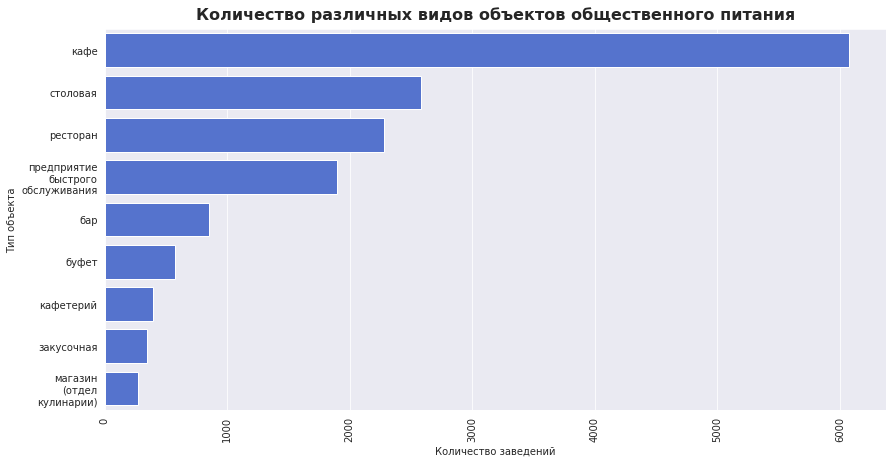

In [40]:
group_obj = rest_data.groupby('object_type')['id'].count().reset_index().sort_values('id',ascending=False).rename(columns={'id':'count'})
obj_sum = group_obj['count'].sum()
group_obj['percent'] =  round((group_obj['count']/obj_sum)*100,2)

wrapped_labels = [label.replace(' ', '\n') for label in group_obj['object_type']]

fig=plt.figure(figsize=(14,7))
sns.set_style('darkgrid')
sns.barplot(x='count', y='object_type', data=group_obj, color='royalblue')
plt.yticks(np.arange(len(wrapped_labels)), wrapped_labels)
plt.xticks(rotation=90)
plt.xlabel('Количество заведений')
plt.ylabel('Тип объекта')
plt.title('Количество различных видов объектов общественного питания', fontdict={'fontsize': 16, 'fontweight':'bold'},y=1.01)
plt.show()

header_count=['Тип объекта', 'Кол-во абс.','Кол-во %']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Table(
    header=dict(values=header_count),
    cells=dict(values=[group_obj[k].tolist() for k in group_obj.columns[:]],
                            align='center')),
               1,1)
fig.add_trace(go.Pie(
    labels=group_obj['object_type'], 
    values=group_obj['count']),
              1, 2)
fig.update_layout(
    legend=dict(y=.5),
    title_text='<b>Соотношение видов объектов общественного питания</b>',
    title_font_family="Arial",
    title_font_color="black",
    title_font_size = 18,
    title_x=0.5
    )
fig.show()

***Вывод***  
По имеющимся данным, среди заведений общественного питания Москвы наибольшее распространение получили кафе - 6071 (39,7%) заведения, столовые - 2584 (16,9%), рестораны 2282 (14,9%). 

# Характеристика сетевых и несетевых заведений.

In [7]:
chain = rest_data.groupby('chain')['id'].count().reset_index()
chain['percent'] = round((chain['id'] / chain['id'].sum())*100,1)

header_chain = ['Статус сети', 'Кол-во абс.', 'Кол-во %']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Table(header=dict(values=header_chain),
    cells=dict(values=[chain[k].tolist() for k in chain.columns[:]],
                            align='center'), name='first plot'),
              1,1)
fig.add_trace(go.Pie(go.Pie(labels=["Cетевой",'Несетевой'], values=chain['id'],pull=0.01, name='Status')),
             1,2)
fig.update_traces(domain=dict(x=[0, 0.45], y=[0, 0.6]), 
                  selector={'name':'first plot'})
fig.update_layout(width=800, height=400,
                  legend_orientation="h",
                  legend=dict(x=.93,xanchor='right'),
                  margin=dict(l=0,r=0,t=25,b=0),
                  title_text='<b>Соотношение сетевых и несетевых объектов</b>',
                  title_font_family="Arial",
                  title_font_color="black",
                  title_font_size = 18,
                  title_x=0.5)
fig.show()

In [8]:
# Определение вида объекта общественного питания, для которого  характерно сетевое распространение.

type_group = rest_data.groupby('object_type')['id'].count().reset_index()

chain_group = rest_data.query('chain in "да"').groupby('object_type')['id'].count().reset_index()

type_group = type_group.merge(chain_group, how='left', on='object_type')
type_group.columns = ['object_type', 'common_obj', 'chain_obj']

type_group['chain_part'] = ((type_group['chain_obj']/type_group['common_obj'])*100).round(2)
type_group = type_group.sort_values('chain_part', ascending=False)

header_group = ['Тип объекта','Общее кол-во абс.','Кол-во сетевых абс.','Доля сетевых %']
fig=make_subplots(rows=1,cols=2,specs=[[{'type':'domain'},{'type':'xy'}]])
fig.add_trace(go.Table(header=dict(values=header_group),
    cells=dict(values=[type_group[k].tolist() for k in type_group.columns[:]],
                            align='center'), name='first plot'),
              1,1)
fig.add_trace(go.Bar(x=type_group['object_type'], y=type_group['chain_part']),1,2)
fig.update_traces(domain=dict(x=[0, 0.45], y=[0, 0.95]), 
                  selector={'name':'first plot'})
fig.update_layout(width=950, height=500,
                  legend_orientation="h",
                  legend=dict(x=.93,xanchor='right'),
                  margin=dict(l=0,r=110,t=25,b=0),
                  title_text='<b>Доля сетевых объектов среди заведений различных типов</b>',
                  title_font_color="black",
                  title_font_size = 18,
                  title_x=0.5)
fig.show()

***Вывод***  
2964 (19,4%) заведений общественного питания Москвы являются сетевыми.

Согласно имеющимся данным, образование сети в наибольшей степени характерно для объектов типа предприятий быстрого обслуживания - 41.5% предприятий. За ними в порядке убывания следуют отделы кулинарии магазинов, рестораны и кафе. В случае закусочных и кафетериев сетевой тип заведения наблюдался в 16 и 13 % соответственно. Наиболее редко сети образуют бары, буфеты и столовые, для них этот показатель составлял менее 5%.

# Характеристика заведений общественного питания по количеству посадочных мест.

## Определение особенностей по количеству объектов в сети и количеству посадочных мест


In [20]:
only_chain = rest_data.query('chain in "да"') # фильтрация заведений по критерию статуса 'сетевого'
num_seat = only_chain.groupby('object_name')['number'].agg(['count', 'median']).reset_index()

display(f'Максимальное количество заведений сети : {num_seat["count"].max()}',
       f'Минимальное количество заведений сети : {num_seat["count"].min()}',
       f'Максимальное количество посадочных мест среди сетевых заведений: {only_chain["number"].max()}',
       f'Минимальное количество посадочных метс среди сетевых заведений: {only_chain["number"].min()}')

fig = px.scatter(num_seat, x= num_seat['count'], 
                 y=num_seat['median'], 
                 marginal_x = 'histogram',
                 marginal_y='histogram', opacity=0.5)
fig.update_layout(width=950, height=600,
                 title_text = ('<b>Распределение заведений по количеству объектов сети и количеству посадочных мест</b>'),
                 title_font_size = 18,
                 title_font_color='black',
                 title_xanchor='center',
                 title_x=.5,
                 xaxis_title = 'Кол-во заведений',
                 yaxis_title = 'Медиана посадочных мест',
                 margin=dict(r=0,l=0,t=50,b=0))
fig.show()

'Максимальное количество заведений сети : 157'

'Минимальное количество заведений сети : 1'

'Максимальное количество посадочных мест среди сетевых заведений: 580'

'Минимальное количество посадочных метс среди сетевых заведений: 0'

***Вывод***   
Распределение объектов общественного питания по количеству заведений сети имеет выраженную правостороннюю ассиметрию, вероятно в том числе за счет наличия заведений с аномально большим количеством посадочных мест. Для получения более детализированной картины и общей тенденции имеет смысл рассмотреть подобные наблюдения как выбросы.

In [23]:
# определяем процентили для границы отсечения выбросов по количеству заведений
num_order = np.percentile(num_seat['count'], [90,95,99]) 
display(num_order)
# определяем процентили для границы отсечения выбросов по количеству посадочных мест
seat_order = np.percentile(num_seat['median'], [90,95,99])
display(seat_order)

num_seat_trunc = num_seat.query('count <= @num_order[1] and median <=@seat_order[1]') # фильтруем датасет по 95 процентилю
display(num_seat.shape[0], num_seat_trunc.shape[0]) 

fig = px.scatter(num_seat_trunc, x= num_seat_trunc['count'], 
                 y=num_seat_trunc['median'], 
                 marginal_x = 'box',
                 marginal_y='box', opacity=0.5)
fig.update_layout(width=950, height=600,
                 title_text = ('<b>Распределение заведений по количеству объектов сети и количеству посадочных мест</b>'),
                 title_font_size = 18,
                 title_font_color='black',
                 title_xanchor='center',
                 title_x=.5,
                 xaxis_title = 'Кол-во заведений',
                 yaxis_title = 'Медиана посадочных мест',
                 margin=dict(r=0,l=0,t=50,b=0))
fig.show()

array([ 8.4, 16.4, 90. ])

array([125.  , 160.  , 253.84])

577

520

***Вывод***  
Как было установлено ранее, 2964 заведения имеют статус сетевого, однако, при группировке заведений выявлено 577 сетей, что можно объяснть либо наличием в городе лишь одного заведения-представителя для целого ряда сетей, либо использование компаниями различных названий для своих объектов. Идентификаторы объектов, предоставленные в настоящем наборе данных не позволяют идентифицировать принадлежность объектов при описанных выше условиях, в силу чего на графике значительное количество наблюдений визуализируется на уровне количества заведений равному 1. 

Исходя из полученных данных, следует, что сети заведений общественного питания в Москве включают от 1 до 157 объектов, лишь 5% (29 абс.) сетей имеет более 16 заведений и лишь 10% имеет более 8 заведений.   

Количество посадочных мест, среди анализируемых сетевых объектов варьировало от 0 до 580, 5% (28 абс.) объектов имеют более 160 мест, медиана посадочных мест равна 40, "средняя" половина заведений имеет от 18 до 80 мест.

Таким образом преобладают (75% от общего количества) сети с относительно небольшим (до 3) количеством объектов и вместимостью до 80 посадочных мест. (3q для распределения количества объектов и посадочных мест)

## Среднее количество посадочных мест для каждого вида объекта общественного питания.

In [24]:
# группируем данные для подсчета среднего кол-ва мест
seat = rest_data.groupby('object_type')['number'].agg(
    ['mean','std','count'
    ]).reset_index().sort_values('mean', ascending=False).round(1)
display(seat.head(1))


,object_type,mean,std,count
8,столовая,130.3,95.2,2584


In [25]:
# расчет CI для Bar plot количества мест в заведениях
z=1.96
seat['low_ci95'] = (seat['mean'] - z*(seat['std']/np.sqrt(seat['count']))).round(1)
seat['upp_ci95'] = (seat['mean'] + z*(seat['std']/np.sqrt(seat['count']))).round(1)

In [27]:
# график среднего распределения среднего кол-ва посадочных мест по типам заведений
fig = make_subplots(rows=1,cols=2,specs=[[{'type':'domain'}, {'type':'xy'}]])
fig.add_trace(go.Table(header=dict(values=['Тип объекта','Среднее кол-во мест']),
                      cells=dict(values=[seat[k].to_list() for k in seat.columns[:2]]),
                      name='first_plot'),1,1)

fig.add_traces(go.Bar(x=seat['object_type'], y=seat['mean'],
                      error_y={'type':'data',
                                   'symmetric':False,
                                   'array':seat['upp_ci95']-seat['mean'],
                                   'arrayminus': seat['mean']-seat['low_ci95']},
                      name='Кол-во мест'),1,2)
fig.update_traces()
fig.update_traces(domain=dict(x=[0, 0.45], y=[0, 0.80]), 
                  selector={'name':'first_plot'})
fig.update_layout(width = 950, height = 600,
                 title_text ='<b>Среднее кол-во посадочных мест</b>',
                 title_font_size = 18,
                 title_xanchor='center',
                 title_x=.5,
                 title_font_color='black',
                 margin = dict(r=0,l=0,t=50,b=0))
fig.show()

***Вывод***  
Наиболее крупными заведениями с точки зрения количества мест являются столовые - в среднем 130 мест, ща ними следуют рестораны и буфеты - 97 мест и 51 соответственно. Наименьшей вместимостью характеризуются отделы кулинарии магазинов - в среднем около 5 посадочных мест. 

# География заведений общественного питания Москвы.

In [28]:
# Выделение в отдельный столбец информации об улице из столбца address .
def street(addr):
    addr=addr.split(',')
    new=''
    for i in addr:
        if 'улица' in i or 'проспект' in i or 'переулок' in i or 'шоссе' in i or 'бульвар' in i or 'проезд' in i or 'набережная' in i or 'площадь' in i or 'аллея' in i or 'Проезд' in i or 'линия' in i or 'деревня' in i or 'тупик' in i or 'квартал' in i:
            new += i
        else:
            pass
    return new

# возможно критерий отбора для улицы или иной территориальной единицы не оптимален, но лучше придумать не смог.
rest_data['street'] = rest_data['address'].apply(street)
rest_data['street'] = rest_data['street'].str.strip()
display(rest_data.head(3))

display(rest_data['street'].isnull().sum())

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица


0

# Топ-10 улиц по количеству объектов общественного питания.  Определение районов, в которых находятся эти улицы.¶

In [49]:
pop_street = rest_data.groupby('street')['id'].count().reset_index().sort_values('id', ascending=False)

pop10=pop_street.reset_index().head(15)
pop10['street'] = pop10['street'].str.strip()
pop10=pop10.loc[1:10,]
display(pop10)

,index,street,id
1,1117,проспект мира,203
2,1121,профсоюзная улица,182
3,743,ленинградский проспект,172
4,1072,пресненская набережная,167
5,411,варшавское шоссе,165
6,746,ленинский проспект,148
7,1113,проспект вернадского,128
8,733,кутузовский проспект,114
9,653,каширское шоссе,111
10,663,кировоградская улица,108


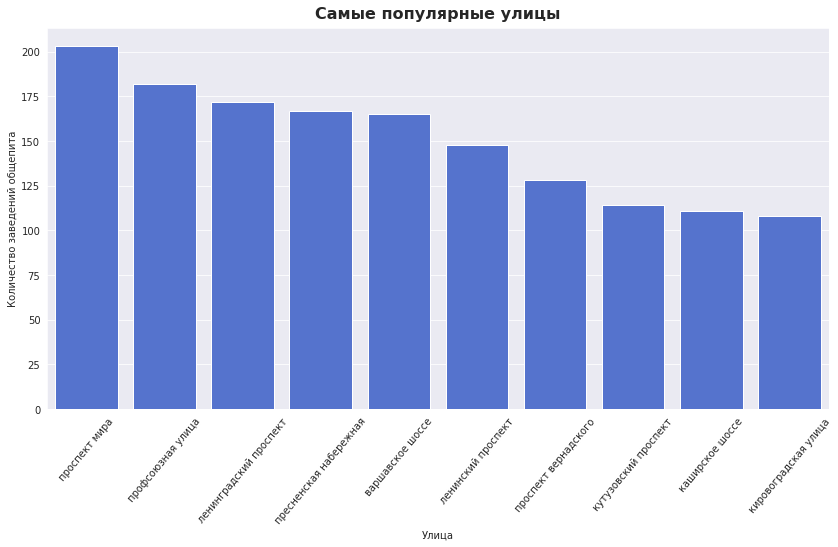

In [48]:
# график самых популярных улиц
fig=plt.figure(figsize=(14,7))
sns.set_style('darkgrid')
sns.barplot(x='street',y='id', data=pop10, color='royalblue')
plt.xticks(rotation=50)
plt.xlabel('Улица')
plt.ylabel('Количество заведений общепита')
plt.title('Самые популярные улицы', fontdict={'fontsize': 16, 'fontweight':'bold'},y=1.01)
plt.show()

## Определение районов соответствующих топ-10 улиц.


In [54]:
districts.columns = ['street','areaid','okrug','area']
districts['street']=districts['street'].str.lower()
pop_area = pd.merge(pop10,districts,how='left',on='street')

un_area = pop_area.groupby('street').area.agg(['unique']).reset_index()
un_area.columns = ['street','area']
display(un_area)

display(un_area['area'].apply(len).sum()) # Количество районов

,street,area
0,варшавское шоссе,"[Район Чертаново Центральное, Район Чертаново ..."
1,каширское шоссе,"[Район Москворечье-Сабурово, Район Нагатино-Са..."
2,кировоградская улица,"[Район Чертаново Центральное, Район Чертаново ..."
3,кутузовский проспект,"[Район Дорогомилово, Район Фили-Давыдково]"
4,ленинградский проспект,"[Район Аэропорт, Район Беговой, Хорошевский ра..."
5,ленинский проспект,"[Район Проспект Вернадского, Район Тропарево-Н..."
6,пресненская набережная,[Пресненский район]
7,проспект вернадского,"[Район Проспект Вернадского, Район Раменки, Ра..."
8,проспект мира,"[Алексеевский район, Ярославский Район, Район ..."
9,профсоюзная улица,"[Академический район, Район Черемушки, Район Я..."


48

***Вывод***  
На графике представлены улицы с наибольшим количеством заведений общественного питания, число которых варьирует от 204 на проспекте Мира до 108 на Кировоградской улице. Данные улицы имеют большое протяжение, в следствии чего относятся к 48 районам Москвы. 320 заведений объединены в одну группу т.к. в адресе данных заведений не указана улица, проспект или аналогичная территориальная единица. Для таких объектов характерно расположение в малонаселенных районах, наличие в них большого количества общепитов не характерно. 


# Определение числа улиц с одним объектом общественного питания. а также районов Москвы, в которых находятся эти улицы.

'Количество улиц с 1 заведением'

576

'Количество районов, в которых расположены эти улицы'

101

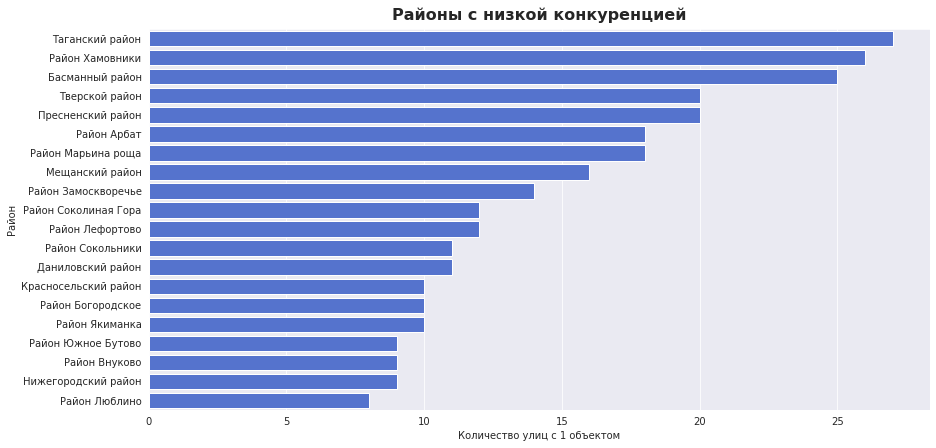

In [59]:
one_obj = pop_street.query('id==1')
display('Количество улиц с 1 заведением',one_obj['street'].count())

one_obj_area = pd.merge(one_obj, districts, how='left',on='street')
display('Количество районов, в которых расположены эти улицы',len(one_obj_area['area'].value_counts()))

one_obj_gr = one_obj_area.groupby('area')['street'].count().reset_index().sort_values('street', ascending=False)
#display(one_obj_gr.head(20))

# график самых популярных улиц
fig=plt.figure(figsize=(14,7))
sns.set_style('darkgrid')
sns.barplot(x='street',y='area', data=one_obj_gr.head(20), color='royalblue')
plt.xlabel('Количество улиц с 1 объектом')
plt.ylabel('Район')
plt.title('Районы с низкой конкуренцией', fontdict={'fontsize': 16, 'fontweight':'bold'},y=1.01)
plt.show()

***Вывод***  
Полученные результаты указывают, что на 576 улицах располагается лишь одно заведение общественного питания. Указанные улицы распределены между 101 районом, с наибольшей концентрацией в таких районах как Таганский, Хамовники, Басманный, Тверской и Пресненский.

# Оценка распределения количества посадочных мест для улиц с большим количеством объектов общественного питания. Определение закономерностей.

'Описание посадочных мест на улицах с большим количеством общепитов'

count    1498.000000
mean       58.216956
std        90.154897
min         0.000000
25%        12.000000
50%        40.000000
75%        75.000000
max      1700.000000
Name: number, dtype: float64

'Описание посадочных мест на улицах с большим количеством общепитов, без выбросов'

count    1400.000000
mean       42.300714
std        38.387684
min         0.000000
25%        12.000000
50%        32.000000
75%        60.000000
max       168.000000
Name: number, dtype: float64

'Количество особенно крупных объектв:'

98

/home/daniil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



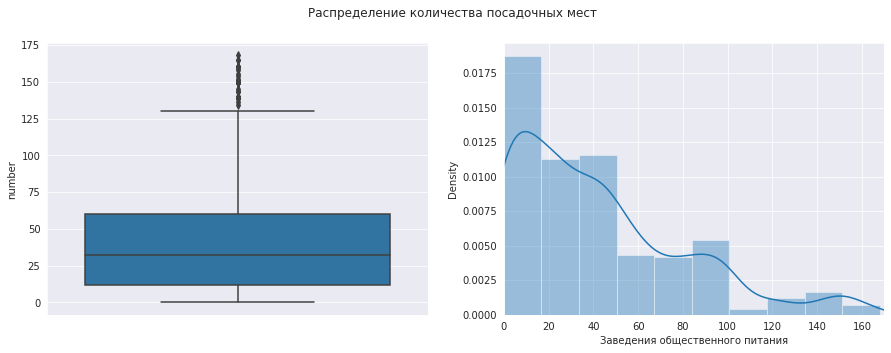

In [60]:
st_list=pop10.street.tolist() 
main_st = rest_data.query('street in @st_list')
display('Описание посадочных мест на улицах с большим количеством общепитов', main_st['number'].describe())

iqr_obj = main_st.query('number <=169')
display('Описание посадочных мест на улицах с большим количеством общепитов, без выбросов', iqr_obj['number'].describe())
display('Количество особенно крупных объектв:',main_st['number'].count()-iqr_obj['number'].count() )

fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax=axes[0],y=iqr_obj['number'])
plt.xlabel('Заведения общественного питания')
plt.suptitle('Распределение количества посадочных мест')

sns.distplot(iqr_obj['number'], norm_hist=True, bins=10,kde=True)
plt.xlim(0, 170)
plt.xlabel('Заведения общественного питания')
plt.show()

***Вывод***  
Анализ данных показал, что на улицах с большим количеством заведений общественного питания, последние могут как не обладать посадочными местами, так и иметь до 1700 мест. Распределение количества мест не является нормальным, среднее их количество составило 58, а медиана 40. Следует отметить, что часть заведений является значительно крупнее остальных, при расчете 1.5 межквартильного интервала установлено, что к такому типу объектов можно отнести заведения с количеством мест более 169, а самих таких общепитов - 98. Без учета подобных крупных среднее количество посадочных мест равно 42.

# Общий вывод.

Выполнен анализ данных о заведениях общественного питания Москвы. 
- Всего проанализировано 15281 уникальных объектов.   
- Наиболее распространенным типом заведения, согласно имеющимся данным, является кафе, за ними по частоте следуют столовые, рестораны и предприятия быстрого обслуживания. Лишь пятая часть от общего количества заведений общественного питания являются сетевыми.   
- Образование сети в наибольшей степени характерно для объектов типа предприятий быстрого обслуживания - до 41% объектов. За ними в порядке убывания установить организовать сеть удалось отделам кулинарии магазинов (28%), ресторанам (23%) и кафе(22%). Закусочные, кафетерии, буфеты, бары и столовые значительно реже формируют сети.   
- Самыми крупными объектами, как правило являются столовые, в среднем они предлагают до 130 посадочных мест, что больше чем у любого другого типа предприятия.  
- Ряд улиц характеризует высокое количество общепитов, к таким относятся Проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, Проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица. Данные улицы располагаются на 48 районах Москвы.
- Полученные результаты показывают, что на 576 улицах располагается лишь одно заведение общественного питания. Указанные улицы распределены между 101 районом, с наибольшей концентрацией в таких районах как Таганский, Хамовники, Басманный, Тверской и Пресненский. Данные районы располагают не менее чем 20 улицами лишь с одним общепитом и могут оказаться перспективными для развития новых общепитов.   
- Согласно полученным результатам - на улицах с большим количеством заведений общественного питания, последние могут как не обладать посадочными местами, так и иметь до 1700 мест. Следует отметить, что часть заведений является значительно крупнее остальных, к такому типу объектов можно отнести заведения с количеством мест более 169, а самих таких общепитов - 98. Без учета подобных крупных объектов - среднее количество посадочных мест равно 42.  

Резюме: 
- кафе - наиболее популярный тип заведений общественного питания, за ним следуют рестораны, столовые и предприятия быстрого обслуживания 
- Кафе, рестораны и предприятия быстрого обслуживания значительно чаще других организуют сети 
- столовые - самые крупные объекты общепита, в буфетах, барах и кафе количество мест в среднем вдвое меньше 
- опыт рынка для сетей: много заведений - мало посадочных мест 
- наиболее востребованные на рынке общепита улицы: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе. 
- Среднее количество посадочных мест на перечисленных улицах - 42 
- Таганский, Хамовники, Басманный, Тверской и Пресненский - представляют менее выраженную конкуренцию для развития предприятий общественного питания. 

